<div class="alert alert-block alert-info"><b>Note:</b> With the use of this IPython 'magic' command <i>%matplotlib inline</i> , the output of plotting commands is 
displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.</div>

<div class="alert alert-block alert-success"><b>Problem 2:</b> Graph the following equation:<br>
y = -2x + 1 </div>

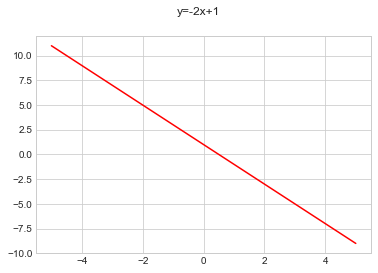

In [28]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.style.use('seaborn-whitegrid')

# The Data
x = np.linspace(-5,5,10)

y = -2*x + 1

# Create the figure and axes objects
fig = plt.figure()
ax = plt.axes()

fig.suptitle('y=-2x+1')

# Plot the data
ax.plot(x,y,color='red')

plt.show()

<div class="alert alert-block alert-success"><b>Problem 9: </b>When gases are heated the gas will expand. The expression for a certain gas $ V(T)=0.154T+29 $ calculates the volume V in cubic centimeter of a sample of gas at temperature T in degrees Celsius. <br/><b>(a)</b> Evaluate V(0) = cubic centimeters 
    <br/><b>(b)</b> If the temperature increases by 10  degrees, by how much does the volume increase? cubic centimeters <br/><b>(c)</b> What is the volume of gas when the temperature is 20 degrees? cubic centimeters​.
</div>

In [29]:
# Defining a function for the volume (V) of the gas at any temperature (T)
def V(T):
    volume = 0.154*T+ 29
    return volume

In [30]:
# (a) 
f"V(0) = {V(0)} cubic centimeters"

'V(0) = 29.0 cubic centimeters'

In [31]:
# (b)
volume_increase = V(10)-V(0)
f"Volume increase after temperature increase: {round(volume_increase,2)} cubic centimeters."

'Volume increase after temperature increase: 1.54 cubic centimeters.'

In [32]:
# (c)
f"Volume of gas when T is 20 is{round(V(20),2)} cubic centimeters."

'Volume of gas when T is 20 is32.08 cubic centimeters.'

<div class="alert alert-block alert-success"><b> 12.</b> 12.	Based on the data shown below, calculate the correlation coefficient (to three decimal places).</div>

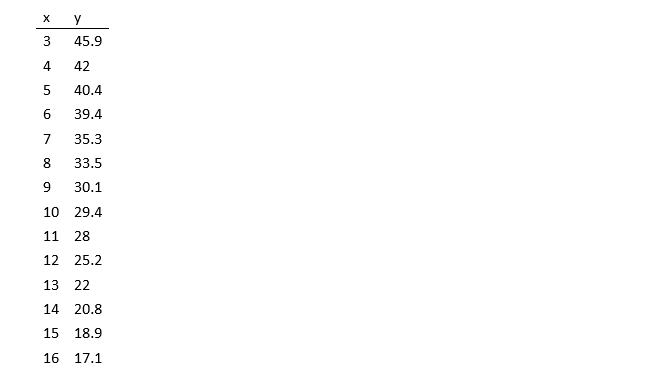

<div class="alert alert-block alert-info"><i>There are two solutions offered below:<br/>
    (1) <b>Using corrcoef from numpy</b> - the function returns a 2-d covariance matrix. To get the correlation coefficient itself 
use the index [0,1] or [1,0] <br/>
    (2) <b>Using pearsonr from scipy</b> - the function returns the correlation coefficient along with the 2-tailed p-value. P-values
will be discussed a lot more in PREDICT 401 but if the values are less than 0.025 in this case, the correlation coefficient value is considered significant.<br/></i></div>

In [2]:
from scipy.stats.stats import pearsonr
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

x = np.array([4,5,6,7,8,9,10,11,12,13,14,15])
y = np.array([10.44,14.15,15.66,14.67,15.98,18.29,19.5,22.41,22.02,22.83,25.74,26.45])

corr_np = np.corrcoef(x, y)[0, 1]
f"Correlation Coefficient using numpy:{round(corr_np,3)}"

'Correlation Coefficient using numpy:0.982'

In [36]:
corr_sci = pearsonr(x, y)[0]
f"Correlation Coefficient using scipy:{round(corr_sci,3)}"

'Correlation Coefficient using scipy:0.982'

<div class="alert alert-block alert-success"><b>Problem 12: </b>The table below show data that has been collected from different fields from various farms in a certain valley. The table contains the grams of Raspberries tested and the amount of their Vitamin C content in mg. Find a linear regression model that express <b>Vitamin C content</b> as a function of the <b>weight of the Raspberries</b>.
<br><br>
Round your answers to 3 decimal places
</div>

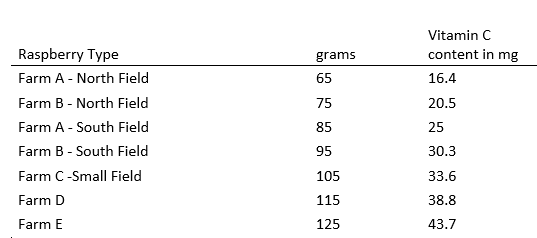

<div class="alert alert-block alert-info">
Prediction (two options) :<br/>
1) linear regression function in scipy.stats is one way to do it <br/>
2) polyfit within numpy <br/>

<b>Option 1:</b> pass in the parameters x and y to the lingress function of scipy.stats package 
The function returns 5 values: slope, intercept, rvalue, pvalue, stderr 
To keep things simple you are mostly concerned with the slope and intercept since these can be used to determine the relationship between x and y
</div>

In [3]:
import sympy as sym
import scipy.stats as st

grams = np.array([70,75,80,85,90,95,100])
vitaminc = np.array([18.5,20.8,23.5,25.5,27,30.3,31.7])

slope,intercept,rvalue,pvalue,stderr = st.linregress(grams,vitaminc)

print ( "Slope = {} and YIntercept = {}".format(slope, intercept) )
# Use sympy package to display the equation
sym.init_printing()
x,y = sym.symbols('x,y')
f = sym.Eq(y,round(slope,3)*x+round(intercept,3))
f

Slope = 0.44357142857142856 and YIntercept = -12.375000000000004


<div class="alert alert-block alert-info">
    <b>Option 2:</b> This is the second option that can be used for prediction.
This is really useful because you can use this to 
fit non-linear polynomials as well <br/>e.g. y = a*x**2 + b just by
specifying the 'degree' of the equation as the third parameter

For deeper exploration visit:
http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html 
</div>

In [4]:
# pass x, y and a degree of 1 since we know there is a linear relationship
slope, intercept = np.polyfit(grams, vitaminc, 1)

print ( "Slope = {} and YIntercept = {}".format(round(slope,3), round(intercept,3)) )

# Use sympy package to display the equation
sym.init_printing()
x,y = sym.symbols('x,y')
f = sym.Eq(y,round(slope,3)*x+round(intercept,3))
f

Slope = 0.444 and YIntercept = -12.375


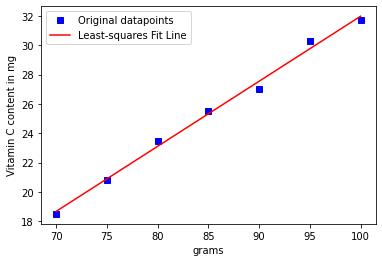

In [5]:
# For demonstration purposes only
# Scatter plot of the various points and a least-squares fit line
import matplotlib.pyplot as plt
plt.figure()
plt.plot(grams, vitaminc, 'bs',label='Original datapoints')
plt.plot(grams, slope*grams + intercept, 'r-',label='Least-squares Fit Line')
plt.xlabel('grams')
plt.ylabel('Vitamin C content in mg')
plt.legend()
plt.show()

<div class="alert alert-block alert-success"><b>Problem 15: </b>
    The table gives the amount of money (in dollars) spent on football by a major university. Letting  x   represent the number of years since 2009, and letting  y   represent the amount of money spent on football, in thousands of dollars, find the equation of the line of best fit.
Round your answers to the nearest hundredth.

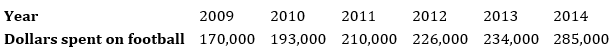

<div class="alert alert-block alert-success">    
<p>
    <b>(a)</b> Find the equation of the line of best fit

Then, use your equation to make the following predictions.    
    
<b>(b)</b> Predict the amount of money that will be spent on football in the year 2022.<br/>

<b>(c)</b> Predict the amount of money that will be spent on football in the year 2043.<br/>

</div>


<div class="alert alert-block alert-info">
 Since x represents the number of years since 2009, our x-values are 0, 1, 2, 3, 4, 5. Since y represents the amount of money in thousands of dollars, our y-values are 170, 193, 210, 226, 234, 285.
</div>

In [6]:
import sympy as sym
import scipy.stats as st

year = np.array([0, 1, 2, 3, 4, 5])     # Starts from 2005 
spending = np.array([165, 197, 210, 229, 248, 282])

slope,intercept,rvalue,pvalue,stderr = st.linregress(year,spending)

slope = round(slope,2)
intercept = round(intercept,2)

# Use sympy package to display the equation
sym.init_printing()
x,y = sym.symbols('x,y')
f = sym.Eq(y,slope*x+intercept)
f

In [52]:
# The year 2021 corresponds to x=16
expected_spending = slope*16 + intercept

f"It is predicted ${round(expected_spending*1000):,} will be spent in 2021"

'It is predicted $513,840.0 will be spent in 2021'

In [53]:
# The year 2041 corresponds to x=36
expected_spending = slope*36 + intercept
f"It is predicted ${round(expected_spending*1000):,} will be spent in 2041"

'It is predicted $946,440.0 will be spent in 2043'

In [13]:
import math
p1 = 30000.00   # 1 year
p3 = 60000.00   # 3years
m = (p3 - p1)/2
print ( "Value of m = {}".format(m) )
#P(x) = mx + b
# p1 = m + b 
b = p1 - m 
print ( "Value of b = {}".format(b) )

p9 = m*9 + b
print ( "Value of p9 = {}".format(p9) )

# 270000 = mx + b, x = (270000 - b)/m
x = (270000 - b)/m
print ( "Value of Years = {}".format(x) )


Value of m = 15000.0
Value of b = 15000.0
Value of p9 = 150000.0
Value of Years = 17.0


In [20]:
# v = 0.152*t + 32. 
slope = 0.152
yintercept = 32

v0 = 32
v40 = slope*40 + yintercept
print( "Value of v40 = {}".format(v40))
incr40 = v40 - 32
print( "Value of incr_40 = {}".format(incr40))

v35 = slope*35 + yintercept
print( "Value of v35 = {}".format(v35))


Value of v40 = 38.08
Value of incr_40 = 6.079999999999998
Value of v35 = 37.32


In [27]:
# y = m*x + b
m = 12000.00
y1 = 23000.00  # 2014

#y1 = m + b
b = y1 - m
print( "Value of b = {}".format(b) )
y5 = m*5 + b
print (y5)
y6 = m*6 + b
print( "Profit for year 2019 = {}".format(y6) )


Value of b = 11000.0
71000.0
Profit for year 2019 = 83000.0


In [43]:
# y = mx + b
m = 9.44
b = 84.182
x = 2013 - 1997
y2013 = m*x + b
print( "Sales for year 2013 = {}".format(y2013) )

# 250 = m*years + b, years = (250 - b)/m
years = (250 - b)/m
print( "years value = {}".format(years) )

print ( 1997 + years )




Sales for year 2013 = 235.22199999999998
years value = 17.565466101694913
2014.565466101695
